# PyTorch MNIST


In [19]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from torchvision import transforms, datasets

## Set up MNIST data


In [20]:
# Download training data and transform it to a Tensor
data = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [21]:
# How many times to go through the dataset
EPOCHS = 20

# How many examples to give the Neural Network before backpropagation
BATCH_SIZE = 64

# Split the train data into equal parts and feed it to the model
train = torch.utils.data.DataLoader(data, batch_size = BATCH_SIZE)

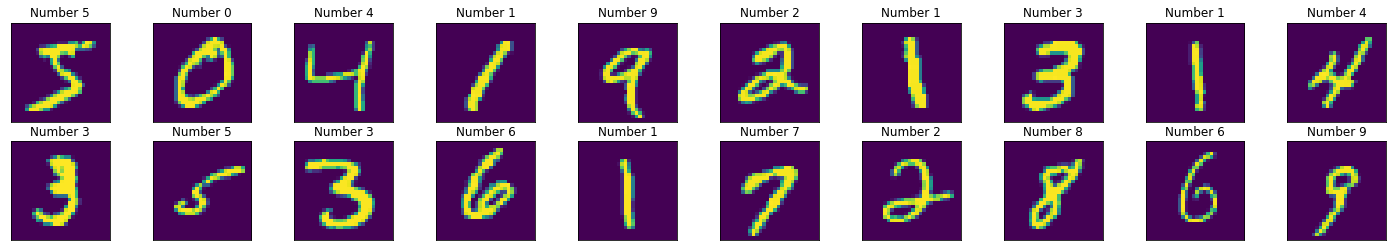

In [22]:
# Show some samples from the training dataset
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   image, label = data [idx]
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(image.view(28, 28))
   ax.set_title(f"Number {label}")

## Neural Network

In [23]:
# Create Neural Network
model = torch.nn.Sequential(
        torch.nn.Linear(784,10),
        torch.nn.Sigmoid(), 
        torch.nn.Linear(10,10), 
        torch.nn.LogSoftmax(dim=1)
        )

# Create Loss function
loss = torch.nn.NLLLoss()

# Create Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [24]:
# How many times to go over the entire dataset
for epoch in range(EPOCHS):
  train_loss = 0
  # Go through the batches of the dataset
  for images, labels in train:
    # Forward pass - flat image
    output = model(images.view(images.shape[0], -1))
    # Calculate loss - prediction and true value
    model_loss = loss(output, labels)
    # Backward pass - Gradient descent
    model_loss.backward()
    # Update weights and bias
    optimizer.step()
    # Reset gradients
    optimizer.zero_grad()
    train_loss += model_loss.item()

  print(f"Loss: {round(train_loss / len(train), 2)}\t\tEpoch {epoch + 1}\n")

Loss: 2.24		Epoch 1

Loss: 2.0		Epoch 2

Loss: 1.69		Epoch 3

Loss: 1.41		Epoch 4

Loss: 1.2		Epoch 5

Loss: 1.05		Epoch 6

Loss: 0.94		Epoch 7

Loss: 0.85		Epoch 8

Loss: 0.79		Epoch 9

Loss: 0.73		Epoch 10

Loss: 0.68		Epoch 11

Loss: 0.64		Epoch 12

Loss: 0.61		Epoch 13

Loss: 0.58		Epoch 14

Loss: 0.55		Epoch 15

Loss: 0.53		Epoch 16

Loss: 0.51		Epoch 17

Loss: 0.49		Epoch 18

Loss: 0.48		Epoch 19

Loss: 0.46		Epoch 20



### Accuracy

In [25]:
# Download test data and transform it to a Tensor
data = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Split the test data into equal parts and feed it to the model
test = torch.utils.data.DataLoader(data, batch_size = BATCH_SIZE)

correct, all = 0, 0
for images,labels in test:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct += 1
    all += 1

print(f"Accuracy: {round((correct / all) * 100)}%")

Accuracy: 89%
